Dự báo bệnh nhân có bệnh tim hay không dựa vào các thông tin age, sex, cp, trestpbs, chol, fbs, restecg, thalach, exang, oldpeak, slope,ca ,thai
Biết rằng tỉ lệ tập train và test là 80:20 với hệ số ngẫu nhiên (random state = 20)
Sử dụng mô hình 7-NN
Đánh giá dữ liệu dựa trên tập dữ liệu test với tốc độ đo
1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1
Với người bệnh có các giá trị tương ứng age, sex, cp, trestpbs, chol, fbs, restecg, thalach, exang, oldpeak, slope,ca ,thai là:

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart_full.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca' ,'thal']].values # input
y = df[['target']].values # output

X = X.astype(float)
y = y.astype(float)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=20)


In [18]:
#Tạo mô hình knn
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=7)

In [19]:
#Huấn luyện mô hình
knnModel.fit(X_train, y_train)


C:\Users\Star\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [20]:
#Dự báo mô hình trên tập x_test
y_test_predicted =knnModel.predict(X_test)
y_test_predicted

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1.])

In [21]:
#Đánh giá độ đo Accuracy

knnModel.score(X_test, y_test)


0.6721311475409836

In [22]:
#PP Confusion-Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix
#TN = 4, FN = 2, FP = 0, TP = 0


array([[33, 23],
       [17, 49]])

In [23]:
#Precision and recall and f-measure
def myscores(smat): 
    tp = smat[1][1] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[0][0] 
    vprecision = tp/(tp+fp)
    vrecall = tp/(tp+fn)
    vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

    return vprecision,vrecall,vf1
print("precision, recall, f1:", myscores(cf_matrix))


precision, recall, f1: (np.float64(0.6805555555555556), np.float64(0.7424242424242424), np.float64(0.7101449275362319))


In [24]:

from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Không bệnh       0.66      0.59      0.62        56
     Có bệnh       0.68      0.74      0.71        66

    accuracy                           0.67       122
   macro avg       0.67      0.67      0.67       122
weighted avg       0.67      0.67      0.67       122



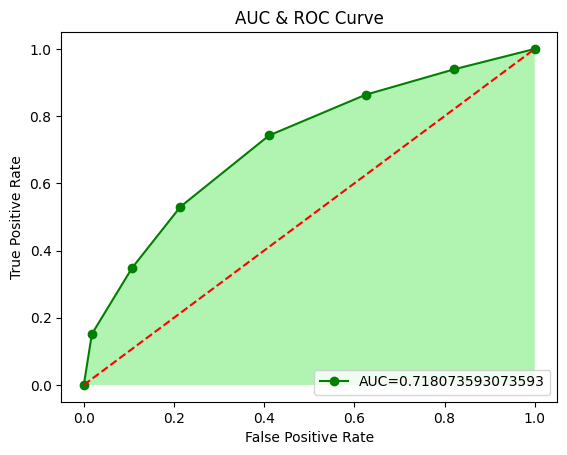

ValueError: could not convert string to float: ''

In [25]:

from sklearn import metrics

y_pred_proba = knnModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))

import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

v1 = float(input('age: '))
v2 = float(input('t_index: '))
v3 = float(input('f_status: '))
v4 = float(input('c_index: '))

y_pred = loaded_model.predict([[v1,v2,v3,v4]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")
